In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
from sklearn.preprocessing import Binarizer
bi=Binarizer(threshold=0.75)

In [5]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


In [7]:
x=df.drop('Chance of Admit ', axis=1)
y=df['Chance of Admit ']

In [8]:
y=y.astype(int)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [10]:
x_train.shape


(300, 8)

In [11]:
x_test.shape

(100, 8)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
classifier=DecisionTreeClassifier(random_state=0)

In [15]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
y_pred = classifier.predict(x_test)

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

In [25]:
accuracy_score(y_test, y_pred)

0.91

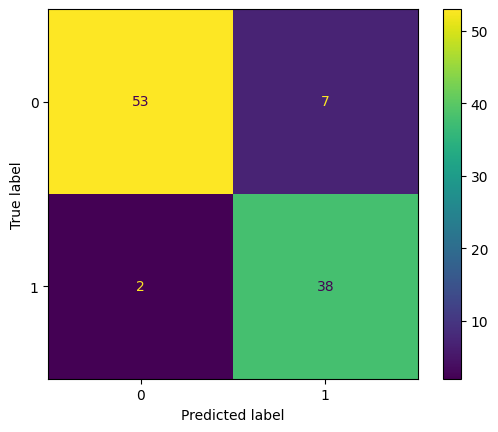

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        60
           1       0.84      0.95      0.89        40

    accuracy                           0.91       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100

